In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/home/socrates/2022_PFE/resume_dataset.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


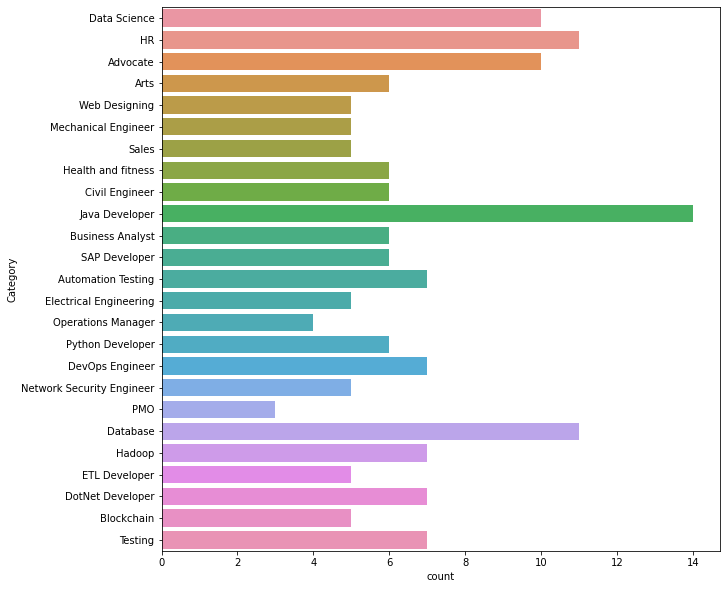

In [3]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.countplot( y = "Category" , data = df ) ;

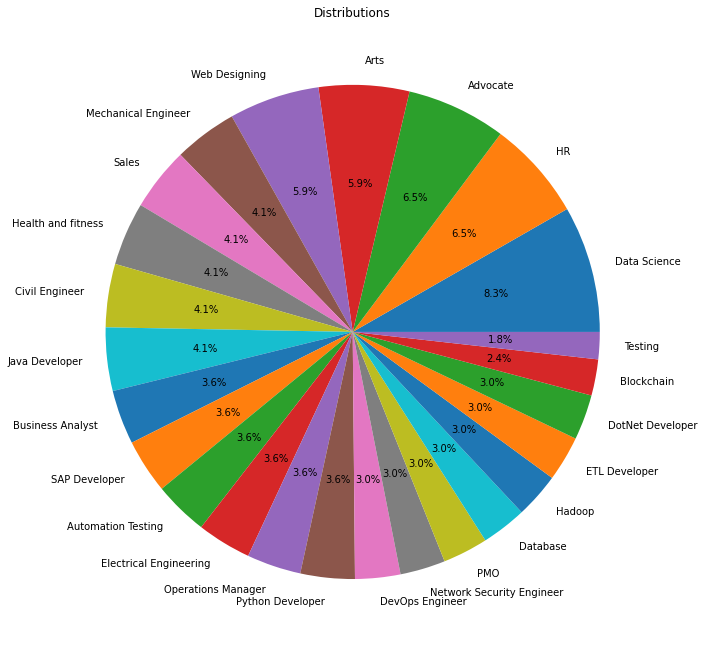

In [4]:
from matplotlib.gridspec import GridSpec

Counts  = df['Category'].value_counts()
Labels  = df['Category'].unique()

plt.figure(1, figsize = (25,25))
grid = GridSpec(2,2)

plt.subplot(grid[0,1], aspect = 1, title = 'Distributions')
pie = plt.pie(Counts, labels = Labels, autopct = '%1.1f%%')


In [5]:
df["Resume"][10]

'TECHNICAL SKILLS â\x80¢ Typewriting â\x80¢ TORA â\x80¢ SPSSEducation Details \r\nJanuary 2017 MBA  Chidambaram, Tamil Nadu SNS College of Engineering\r\nJanuary 2014 HSC   at SAV Higher Secondary School\r\n MBA   SNS College of Engineering\r\n SSLC Finance  at Kamaraj Matriculation SchoolHRSkill Details \r\nHuman resource, Finance- Exprience - Less than 1 year monthsCompany Details \r\ncompany - \r\ndescription - '

In [6]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove non-ascii characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [7]:
df["Cleaned Resume"] = df.Resume.apply(lambda x: cleanResume(x))
df["Cleaned Resume"][10]

'TECHNICAL SKILLS Typewriting TORA SPSSEducation Details January 2017 MBA Chidambaram Tamil Nadu SNS College of Engineering January 2014 HSC at SAV Higher Secondary School MBA SNS College of Engineering SSLC Finance at Kamaraj Matriculation SchoolHRSkill Details Human resource Finance Exprience Less than 1 year monthsCompany Details company description '

In [8]:
df.head()

,Category,Resume,Cleaned Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [9]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [10]:
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

paragraph=""
total_words = []
for sentence in df["Cleaned Resume"] :
    paragraph+= sentence
    words = word_tokenize(sentence)
    for word in words :
         if word not in set(stopwords.words('english')) and word not in string.punctuation:
            total_words.append(word)


In [11]:
freq_word = nltk.FreqDist(total_words)
freq_word.most_common(10)

[('Exprience', 634),
 ('months', 530),
 ('company', 526),
 ('Details', 519),
 ('description', 464),
 ('1', 358),
 ('Project', 299),
 ('data', 244),
 ('project', 235),
 ('6', 234)]

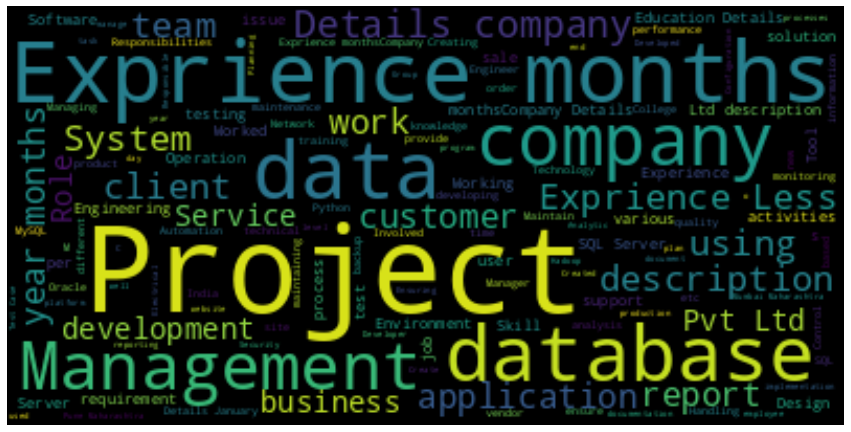

In [12]:
from wordcloud import WordCloud
wc = WordCloud().generate(paragraph)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Labels']=le.fit_transform(df.Category)

In [14]:
df.sample(5)

,Category,Resume,Cleaned Resume,Labels
42,Mechanical Engineer,Education Details \r\nMay 1999 to September 20...,Education Details May 1999 to September 2002 D...,16
69,Java Developer,Education Details \r\n BE IT pjlceJava Devel...,Education Details BE IT pjlceJava DeveloperJav...,15
114,DevOps Engineer,CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbuc...,CORE COMPETENCIES Ant Maven GIT Bitbucket Jenk...,8
121,Network Security Engineer,Communication Skills My writing skills in Engl...,Communication Skills My writing skills in Engl...,17
97,Electrical Engineering,Skills: 1) MC Office 2) AutoCAD 2016 3) Introd...,Skills 1 MC Office 2 AutoCAD 2016 3 Introducto...,11


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

text = df["Cleaned Resume"].values
labels = df["Labels"].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)

vec_df = word_vectorizer.fit_transform(text)
vec_df.shape

(169, 1500)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(vec_df,labels,random_state=0, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(135, 1500)
(135,)
(34, 1500)
(34,)


In [17]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy of MultinomialNB Classifier on training set: 0.84
Accuracy of MultinomialNB Classifier on test set: 0.26

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         3
          15       0.13      1.00      0.24         2
          16       0.00      0.00      0.0

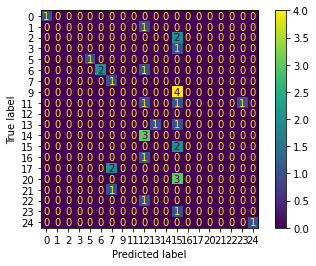

In [20]:
from sklearn.naive_bayes import MultinomialNB

model = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction = model.predict(X_test)

print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of LogisticRegression Classifier on training set: 0.84
Accuracy of LogisticRegression Classifier on test set: 0.26

 Classification report for classifier OneVsRestClassifier(estimator=LogisticRegression()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.20      1.00      0.33         1
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         3
          15       0.14      1.00      0.25         2
          16       0.00    

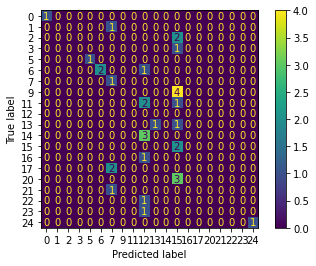

In [55]:
from sklearn.linear_model import LogisticRegression

model = OneVsRestClassifier(LogisticRegression()).fit(X_train,y_train)

prediction = model.predict(X_test)

print('Accuracy of LogisticRegression Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of LogisticRegression Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of RandomForest Classifier on training set: 1.00
Accuracy of RandomForest Classifier on test set: 0.47

 Classification report for classifier OneVsRestClassifier(estimator=RandomForestClassifier()):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       1.00      0.67      0.80         3
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         0
           9       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         2
          14       1.00      0.33      0.50         3
          15       0.29      1.00  

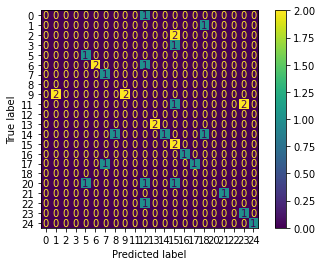

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = OneVsRestClassifier(RandomForestClassifier()).fit(X_train,y_train)
prediction = model.predict(X_test)

print('Accuracy of RandomForest Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of RandomForest Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of DecisionTree Classifier on training set: 1.00
Accuracy of DecisionTree Classifier on test set: 0.53

 Classification report for classifier OneVsRestClassifier(estimator=DecisionTreeClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00         1
           9       0.67      0.50      0.57         4
          11       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.33      0.50         3
          15       0.40      1.00      0.57         2
          16       0.50      1.00      0.67         1
          17       1.00      1.00  

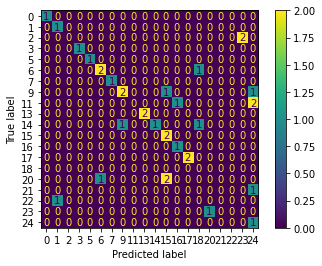

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train,y_train)
prediction = model.predict(X_test)

print('Accuracy of DecisionTree Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of DecisionTree Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of KNeighbors Classifier on training set: 0.88
Accuracy of KNeighbors Classifier on test set: 0.79

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         4
          11       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.

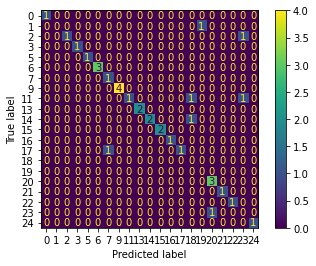

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train,y_train)
prediction = model.predict(X_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of SGDClassifier Classifier on training set: 1.00
Accuracy of SGDClassifier Classifier on test set: 0.88

 Classification report for classifier OneVsRestClassifier(estimator=SGDClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           9       1.00      0.75      0.86         4
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.0

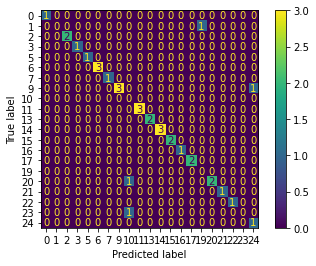

In [38]:
from sklearn.linear_model import SGDClassifier

model = OneVsRestClassifier(SGDClassifier()).fit(X_train,y_train)
prediction = model.predict(X_test)

print('Accuracy of SGDClassifier Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of SGDClassifier Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

Accuracy of LinearSVC Classifier on training set: 1.00
Accuracy of LinearSVC Classifier on test set: 0.91

 Classification report for classifier OneVsRestClassifier(estimator=LinearSVC()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         3
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         1


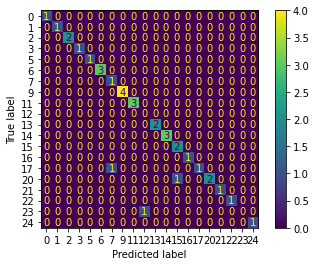

In [19]:
from sklearn.svm import LinearSVC

model = OneVsRestClassifier(LinearSVC()).fit(X_train, y_train)
prediction = model.predict(X_test)

print('Accuracy of LinearSVC Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of LinearSVC Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (model,classification_report(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()